In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"]=(15,5)

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams

In [0]:
data = pd.read_csv("2015.csv")
#data = pd.read_csv("2016.csv")
#data = pd.read_csv("2017.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness State
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Very Happy
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Very Happy
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Very Happy
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Very Happy
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Very Happy


In [0]:
# null values
data.isnull()
data.dropna()
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness State
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Very Happy
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Very Happy
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Very Happy
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Very Happy
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Very Happy


In [0]:
# Exploracion de datos 
data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Happiness State                   object
dtype: object

In [0]:
data.drop(['Country'],axis=1, inplace=True)
data.drop(['Region'],axis=1,inplace=True)
data.drop(['Happiness Rank'],axis=1,inplace=True)
data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness State
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Very Happy
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Very Happy
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Very Happy
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Very Happy
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Very Happy
...,...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,Happy
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,Happy
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,Unhappy
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,Unhappy


MODELO DE ARBOL DE DECISION



El objeto sklearn.preprocessing.LabelEncoder, que nos transforma automáticamente las cadenas a números y lo usamos de la siguiente forma:


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['Happiness State'])
data['Happines_cod'] = le.transform(data['Happiness State'])
data.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness State,Happines_cod
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Very Happy,2
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Very Happy,2
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Very Happy,2
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Very Happy,2
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Very Happy,2


Separamos los datos , donde data es igual a las variables independientes y target la variable dependiente u objetivo


In [0]:
_data = data.drop(['Happiness State','Happines_cod'],axis=1)
_data.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [0]:
_target = data.Happines_cod
_target.head()

0    2
1    2
2    2
3    2
4    2
Name: Happines_cod, dtype: int64

Separamos los Datos.... Entrenamiento y test


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(_data, _target,
                                                    test_size=0.33,
                                                    random_state=101,
                                                    shuffle =True)

print('Set de datos para Entrenamiento =',len(X_train))
print('Set de datos para Test',len(X_test))
print('Total',len(X_test)+len(X_train))
print('Data Shape=',X_test.shape)
print('Target Shape =',y_test.shape)

X_train.head()

Set de datos para Entrenamiento = 105
Set de datos para Test 53
Total 158
Data Shape= (53, 9)
Target Shape = (53,)


,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
29,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
37,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323
135,4.077,0.04367,0.54649,0.68093,0.40064,0.35571,0.07854,0.09131,1.92313
61,5.759,0.04394,1.08254,0.79624,0.78805,0.25883,0.02430,0.05444,2.75414
125,4.369,0.08096,0.44025,0.59207,0.36291,0.46074,0.28105,0.18093,2.05125


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

arbol = DecisionTreeClassifier(max_depth=None, criterion='entropy', random_state=454)


In [0]:
warnings.filterwarnings('ignore')

# ? cross_val_score()
cross_val_score(arbol, _data, _target)
arbol.fit(X_train,y_train)

print ("Score with data Test",arbol.score(X_test,y_test))
print ("Score with data Train",arbol.score(X_train,y_train))

Score with data Test 1.0
Score with data Train 1.0


In [0]:
!pip install graphviz

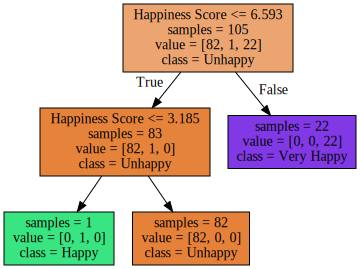

In [0]:
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz-2.38\release\bin\dot.exe'

_target_names = ['Unhappy', 'Happy', 'Very Happy']
_feature_names =['Happiness Score',
 'Standard Error',
 'Economy',
 'Family',
 'Health',
 'Freedom',
 'Trust',
 'Generosity',
 'Dystopia']

export_graphviz(arbol,out_file='arbol.dot',class_names=_target_names,
                feature_names=_feature_names,
                impurity=False,filled=True
               )

with open('arbol.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Prediccion


In [0]:
warnings.filterwarnings('ignore')
# Alguna Predicción....
prediccion = arbol.predict([[3.34,0.03656,0.28665,0.35386,0.3191,0.4845,0.0801,0.1826,1.63328]])
#prediccion = arbol.predict(X_test)
print(prediccion, le.inverse_transform(prediccion))

[0] ['Happy']


Reporte de clasificacion


In [0]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

p = arbol.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, p))
print ('\nConfusion Matrix:\n', confusion_matrix(y_test, p))
print ('\nClassification Report:\n', classification_report(y_test, p))

Accuracy: 1.0

Confusion Matrix:
 [[45  0  0]
 [ 0  2  0]
 [ 0  0  6]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         6

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



MODELO KNN 

In [0]:
dataKNN = pd.read_csv("2015.csv")
dataKNN.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness State
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Very Happy
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Very Happy
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Very Happy
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Very Happy
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Very Happy


In [0]:
dataKNN.isnull()
dataKNN.dropna()
dataKNN.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness State
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Very Happy
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Very Happy
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Very Happy
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Very Happy
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Very Happy


In [0]:
dataKNN.drop(['Country'],axis=1, inplace=True)
dataKNN.drop(['Region'],axis=1,inplace=True)
dataKNN.drop(['Happiness Rank'],axis=1,inplace=True)
dataKNN.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness State
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Very Happy
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Very Happy
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Very Happy
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Very Happy
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Very Happy


In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data['Happiness State'])
dataKNN['Happines_cod'] = le.transform(dataKNN['Happiness State'])
dataKNN.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness State,Happines_cod
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,Very Happy,2
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,Very Happy,2
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,Very Happy,2
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,Very Happy,2
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,Very Happy,2


Separamos los datos , donde data es igual a las variables independientes y target la variable dependiente u objetivo

In [0]:
_dataKNN = data.drop(['Happiness State','Happines_cod'],axis=1)
_dataKNN = data.drop(['Happiness State'],axis=1)
_dataKNN.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happines_cod
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2


In [0]:
_targetKNN = dataKNN.Happines_cod
_targetKNN.head()

0    2
1    2
2    2
3    2
4    2
Name: Happines_cod, dtype: int64

Separamos los Datos.... Entrenamiento y test


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(_dataKNN, _targetKNN,
                                                    test_size=0.33,
                                                    random_state=101,
                                                    shuffle =True)

print('Set de datos para Entrenamiento =',len(X_train))
print('Set de datos para Test',len(X_test))
print('Total',len(X_test)+len(X_train))
print('Data Shape=',X_test.shape)
print('Target Shape =',y_test.shape)

X_train.head()

Set de datos para Entrenamiento = 105
Set de datos para Test 53
Total 158
Data Shape= (53, 10)
Target Shape = (53,)


,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happines_cod
29,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,0
37,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323,0
135,4.077,0.04367,0.54649,0.68093,0.40064,0.35571,0.07854,0.09131,1.92313,0
61,5.759,0.04394,1.08254,0.79624,0.78805,0.25883,0.02430,0.05444,2.75414,0
125,4.369,0.08096,0.44025,0.59207,0.36291,0.46074,0.28105,0.18093,2.05125,0


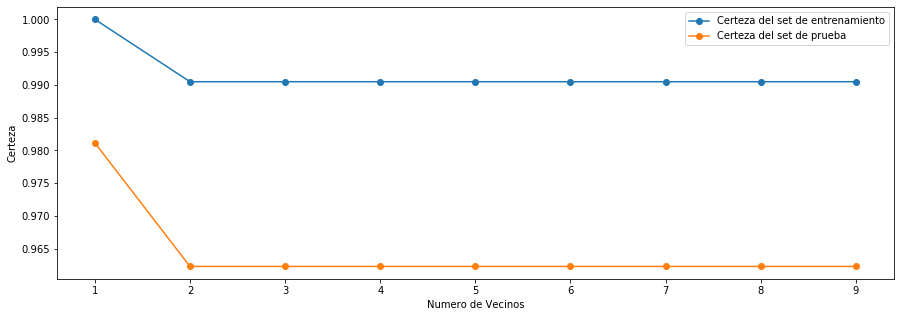

In [0]:
from sklearn.neighbors import KNeighborsClassifier
# Create two lists for training and test accuracies
training_accuracy = []
test_accuracy = []

# Define a range of 1 to 10 (included) neighbors to be tested
neighbors_settings = range(1,10)

# Loop with the KNN through the different number of neighbors to determine the most appropriate (best)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm='auto', weights='uniform')
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

# Visualize results - to help with deciding which n_neigbors yields the best results (n_neighbors=1, in this case)
plt.plot(neighbors_settings, training_accuracy, label='Certeza del set de entrenamiento', marker='o')
plt.plot(neighbors_settings, test_accuracy, label='Certeza del set de prueba', marker='o')
plt.ylabel('Certeza')
plt.xlabel('Numero de Vecinos')
plt.legend()

In [0]:
clf = KNeighborsClassifier(n_neighbors=1,weights='uniform', algorithm='auto')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
#? KNeighborsClassifier

1.0
0.9811320754716981


In [0]:
warnings.filterwarnings('ignore')

ind = 1
print(_dataKNN.iloc[ind])
print('Happiness State',_targetKNN.iloc[ind], le.inverse_transform(_targetKNN.iloc[[ind]]))
x_new = _dataKNN.iloc[ind]

print('\n======== PREDICTION ========')
prediction = clf.predict([x_new])
prediction
prediction_pb = clf.predict_proba([x_new.values])
print('Happiness State prediction',prediction, le.inverse_transform(prediction))
print('Probability Happiness State prediction',prediction_pb)

Happiness Score                  7.56100
Standard Error                   0.04884
Economy (GDP per Capita)         1.30232
Family                           1.40223
Health (Life Expectancy)         0.94784
Freedom                          0.62877
Trust (Government Corruption)    0.14145
Generosity                       0.43630
Dystopia Residual                2.70201
Happines_cod                     2.00000
Name: 1, dtype: float64
Happiness State 2 ['Very Happy']

======== PREDICTION ========
Happiness State prediction [2] ['Very Happy']
Probability Happiness State prediction [[0. 0. 1.]]


Reporte de clasificacion

In [0]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

p = clf.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, p))
print ('\nConfusion Matrix:\n', confusion_matrix(y_test, p))
print ('\nClassification Report:', classification_report(y_test, p))

Accuracy: 0.9811320754716981

Confusion Matrix:
 [[45  0  0]
 [ 1  1  0]
 [ 0  0  6]]

Classification Report:               precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         6

    accuracy                           0.98        53
   macro avg       0.99      0.83      0.89        53
weighted avg       0.98      0.98      0.98        53

